# Create list from Simlex 999

In [8]:
import pandas

data= pandas.read_csv('/content/SimLex-999.txt', sep='\t', engine='python')

In [7]:
data.head()

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93


In [9]:
import collections

data_set = set(data['word1'].append(data['word2'])) 


In [ ]:
n_list = collections.defaultdict(dict)
 
for item in data_set:
  for index, row in data.iterrows():
    if(row['word1'] == item ):
      n_list[item][row['word2']] = row['SimLex999']
    if(row['word2'] == item):
      n_list[item][row['word1']] = row['SimLex999']

In [10]:
import copy
n_list2 = copy.deepcopy(n_list)

for values in n_list[item].keys():
  if (len(n_list[item]) <10 ):
    for value in n_list[values]:
      if( item != value):
        n_list2[item][value] = n_list[values][value]

In [12]:
from collections import OrderedDict
from operator import itemgetter

sort_dict_10 = collections.defaultdict(dict)

for i in n_list2.keys():
  sort_dict_10[i] =  (OrderedDict(sorted( n_list2[i].items(), key=itemgetter(1), reverse=True)[:10]))

In [12]:
sort_dict_10['old']

{'ancient': 0.23, 'fresh': 6.83, 'new': 6.83, 'recent': 7.05, 'wide': 0.4}

In [13]:
for key in sort_dict_10.keys():
  for value in sort_dict_10[key].keys():
    sort_dict_10[key][value] = 1

In [ ]:
import json
with open('sort_dict_10.json', 'w') as fp:
        json.dump(sort_dict_10, fp, indent=2)

# Word2Vec 

In [ ]:
!pip install pytrec-eval-terrier

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [3]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [4]:
from nltk.corpus import brown

In [205]:
train_set = brown.sents(categories='news')

In [206]:
len(train_set)

4623

In [96]:
def calculate_w2v(train_set, size, window):
  model = Word2Vec(train_set, size=size, window=window, min_count=1, workers=4, iter=1000)
  
  pickle.dump(model,open("word2vec_%s_%s.model" % (size, window),"wb"))

In [139]:
from keras.models import load_model
import collections
import json
import pickle

def evaluate_w2v(data_set, size, window):

  w2v_dict = collections.defaultdict(dict)

  model = pickle.load(open("word2vec_%s_%s.model" % (size, window),"rb"))

  for word in data_set:
    if(word in model.wv.vocab):
      w2v_dict[word] = dict(model.wv.most_similar(word, topn=10) )

  with open('w2v_dict_10_%s_%s.json' % (size, window), 'w') as fp:
        json.dump(w2v_dict, fp, indent=2)

  print('---Example for "coat" for window = {}, size = {}---'.format(window, size))
  print(w2v_dict['coat'])

  return w2v_dict

In [56]:
w2v_dict = collections.defaultdict(dict)

In [115]:
from time import time

In [140]:
for window in [1, 2, 5, 10]:
  for size in [10, 50, 100, 300]:
    start = time()
    calculate_w2v(train_set, size, window)
    end = time()
    w2v_dict[str(window) + "x" + str(size)]  =  evaluate_w2v(sort_dict_10.keys(), size, window)
    print("Time taken = {} minutes".format((end-start)/60))
    print()

---Example for "coat" for window = 1, size = 10---
{'beautiful': 0.9203821420669556, '?': 0.9099258184432983, 'gentlemanly': 0.9029088020324707, 'clubs': 0.8959744572639465, 'Farm': 0.8947556018829346, 'tradition': 0.8888198733329773, '$5': 0.8858486413955688, 'confirming': 0.8827780485153198, 'follows': 0.8821460008621216, 'drove': 0.8748118281364441}
Time taken = 6.013306653499603 minutes

---Example for "coat" for window = 1, size = 50---
{'herself': 0.7234134078025818, 'noting': 0.6868569850921631, 'evidently': 0.6475902199745178, 'spun': 0.6347422003746033, 'furs': 0.6224028468132019, 'Gets': 0.6195913553237915, 'tracks': 0.6062365770339966, 'filmy': 0.6061901450157166, 'interstate': 0.5923944115638733, 'upstairs': 0.591831624507904}
Time taken = 6.583594524860382 minutes

---Example for "coat" for window = 1, size = 100---
{'noting': 0.6971226334571838, 'herself': 0.693163275718689, 'flying': 0.610471248626709, 'prestige': 0.6096903085708618, 'Newman': 0.6068985462188721, 'Watson

In [203]:
train_set = brown.sents(categories='romance')

In [126]:
w2v_dict = collections.defaultdict(dict)

for window in [1, 2, 5, 10]:
  for size in [10, 50, 100, 300]:
    start = time()
    calculate_w2v(train_set, size, window)
    end = time()
    w2v_dict[str(window) + "x" + str(size)]  =  evaluate_w2v(sort_dict_10.keys(), size, window)
    print("Time taken = {} minutes".format((end-start)/60))
    print()


---Example for "hero" for window = 1, size = 10---
{'broad': 0.9398741126060486, 'September': 0.9167139530181885, 'mail': 0.9140872955322266, 'blocks': 0.9124258756637573, 'sorts': 0.9108157753944397, 'immortal': 0.9095488786697388, 'defeatism': 0.9064130783081055, 'agencies': 0.9049108028411865, 'points': 0.9022621512413025, 'salacious': 0.9005990624427795}
Time taken = 3.9851372917493184 minutes

---Example for "hero" for window = 1, size = 50---
{'pigs': 0.8877168893814087, 'undoing': 0.8838152885437012, 'magic': 0.8799055814743042, 'vestments': 0.8789108395576477, 'pan': 0.8720840811729431, 'philharmonic': 0.864040195941925, 'description': 0.8593283295631409, 'operation': 0.8571062684059143, 'revolved': 0.8428822755813599, 'Astronomy': 0.8410695195198059}
Time taken = 4.237511730194091 minutes

---Example for "hero" for window = 1, size = 100---
{'pigs': 0.9095875024795532, 'operation': 0.8881607055664062, 'magic': 0.8876371383666992, 'vestments': 0.8868706822395325, 'pan': 0.88011

# Evaluation of Word2vec models using Pytrec eval

In [134]:
import pytrec_eval


def pytrec_eval_w2v(sort_dict_10, w2v_dict, genre):
  evaluator = pytrec_eval.RelevanceEvaluator(
      sort_dict_10, {'ndcg'})

  # print(json.dumps(evaluator.evaluate(w2v_dict), indent=2))
  print("---------- For {}:--------".format(genre))
  for dictionary in w2v_dict.keys():
    res = evaluator.evaluate(w2v_dict[dictionary])

    for query_id, query_measures in sorted(res.items()):
          for measure, value in sorted(query_measures.items()):
              # print(measure, query_id, value)
              continue

    for measure in sorted(query_measures.keys()):
          print( "nDCG score for " + dictionary ,
              pytrec_eval.compute_aggregated_measure(
                  measure,
                  [query_measures[measure]
                  for query_measures in res.values()]))

In [135]:
pytrec_eval_w2v(sort_dict_10, w2v_dict, 'romance')

---------- For romance:--------
nDCG score for 1x10 0.006704859993550442
nDCG score for 1x50 0.007928021472546997
nDCG score for 1x100 0.006511419824427791
nDCG score for 1x300 0.006469205970937002
nDCG score for 2x10 0.006186795083110066
nDCG score for 2x50 0.008794989431072816
nDCG score for 2x100 0.00795493421637018
nDCG score for 2x300 0.007406248198746938
nDCG score for 5x10 0.006332252586735033
nDCG score for 5x50 0.013056943424495723
nDCG score for 5x100 0.008500487377997816
nDCG score for 5x300 0.0092205965648382
nDCG score for 10x10 0.004104827855198461
nDCG score for 10x50 0.007480234607450429
nDCG score for 10x100 0.006305917095736932
nDCG score for 10x300 0.006562048918452478


In [142]:
pytrec_eval_w2v(sort_dict_10, w2v_dict, 'news')

---------- For news:--------
nDCG score for 1x10 0.00331729417609952
nDCG score for 1x50 0.0043387332535210895
nDCG score for 1x100 0.0034719015818307163
nDCG score for 1x300 0.0037100226423294213
nDCG score for 2x10 0.0032834340327686667
nDCG score for 2x50 0.0072804714226049
nDCG score for 2x100 0.00800763646227483
nDCG score for 2x300 0.0040518703277036315
nDCG score for 5x10 0.0016122179025636453
nDCG score for 5x50 0.009113272284384563
nDCG score for 5x100 0.004914856969902033
nDCG score for 5x300 0.005003408335323063
nDCG score for 10x10 0.0004993226319172903
nDCG score for 10x50 0.009665528472723613
nDCG score for 10x100 0.005861872941514511
nDCG score for 10x300 0.0047953568239530765


# TFIDF

In [88]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [146]:
sents_list = [" ".join(sent) for sent in train_set]

In [147]:
sents_list[:5]

["The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .",
 "The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .",
 "The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .",
 "`` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .",
 "The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' ."]

In [149]:
def caculate_tfidf(data, genre):
  start = time()
  tfIdfVectorizer=TfidfVectorizer(stop_words="english", min_df=1, max_df=0.2, decode_error='ignore')
  tfIdf = tfIdfVectorizer.fit_transform(data)
  end = time()
  print('Time taken for {} genre is {} minutes'.format(genre, (end-start)/60))
  return tfIdfVectorizer

In [162]:
import collections
from operator import itemgetter

def get_top_words(tfidf_dict, genre):
  sort_dict_tfidf = collections.defaultdict()

  for word in tfidf_dict:
    sort_dict_tfidf[word] =  (collections.OrderedDict(sorted( tfidf_dict[word].items(), key=itemgetter(1))[:10]))

  with open('tfidf_dict_10.json', 'w') as fp:
        json.dump(sort_dict_tfidf, fp, indent = 2)

  return sort_dict_tfidf

In [145]:
import itertools
from sklearn.metrics.pairwise import cosine_similarity


def calculate_cosine_similarity(tfIdfVectorizer, data_set, genre):

  features = tfIdfVectorizer.vocabulary_.keys()
  tfidf_dict = collections.defaultdict(dict)

  for word in data_set:
    word2 = tfIdfVectorizer.transform([word])
    for feature in features:
      word1 = tfIdfVectorizer.transform([feature])
      tfidf_dict[word][feature] = float(cosine_similarity(word1, word2))

  get_top_words(tfidf_dict, genre)

In [150]:
tfIdfVectorizer = caculate_tfidf(sents_list, 'news')

Time taken for news genre is 0.0036126454671223957 minutes


In [ ]:
sort_dict_tfidf_news = collections.defaultdict()
  
sort_dict_tfidf_news = calculate_cosine_similarity(tfIdfVectorizer, sort_dict_10.keys(), 'news' )

In [202]:
# For romance category

train_set = brown.sents(categories='romance')
sents_list = [" ".join(sent) for sent in train_set]

In [158]:
tfIdfVectorizer = caculate_tfidf(sents_list, 'romance')

Time taken for romance genre is 0.0013535499572753906 minutes


In [ ]:
sort_dict_tfidf_romance = collections.defaultdict()

sort_dict_tfidf_romance = calculate_cosine_similarity(tfIdfVectorizer, sort_dict_10.keys(), 'romance' )

# Evaluation of TFIDF models using Pytrec eval

In [166]:
import pytrec_eval

evaluator = pytrec_eval.RelevanceEvaluator(
    sort_dict_10, {'ndcg'})

res = evaluator.evaluate(sort_dict_tfidf_news)

In [176]:
print("---NDCG SCORES FOR TFIDF FOR NEWS CORPUS---")
for query_id, query_measures in sorted(res.items())[:200]:
        for measure, value in sorted(query_measures.items()):
            if(value > 0):
              print(query_id, value)

---NDCG SCORES FOR TFIDF FOR NEWS CORPUS---
adult 0.08514311764162098
ancient 0.16958010263680806
aunt 0.15101961822780524
bell 0.22009176629808017
boy 0.08514311764162098
brother 0.08514311764162098


In [167]:
for measure in sorted(query_measures.keys()):
        print(
            measure, "score for news genre = ",
            pytrec_eval.compute_aggregated_measure(
                measure,
                [query_measures[measure]
                 for query_measures in res.values()]))

ndcg score for news genre =  0.0004707312776854823


In [178]:
# for romance category

res = evaluator.evaluate(sort_dict_tfidf_romance)

In [177]:
for measure in sorted(query_measures.keys()):
        print(
            measure, "score for romance genre = ",
            pytrec_eval.compute_aggregated_measure(
                measure,
                [query_measures[measure]
                 for query_measures in res.values()]))

ndcg score for romance genre =  0.0040742048212582555


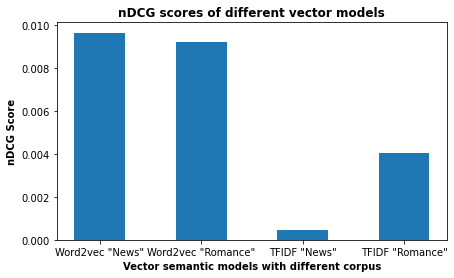

In [211]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7, 4))
models = ['Word2vec "News"', 'Word2vec "Romance"', 'TFIDF "News"', 'TFIDF "Romance"']
scores = [0.00966, 0.00922, 0.00047, 0.00407]
plt.bar(models, scores, width = 0.5)
plt.xlabel("Vector semantic models with different corpus", fontweight ='bold')
plt.ylabel("nDCG Score", fontweight ='bold')
plt.title("nDCG scores of different vector models", fontweight ='bold')
plt.show()